<h3>Akwasi Baryeh Mbeleck Berle</h3>
Resources
<br>
<ul>
<li><a href="https://scikit-learn.org/stable/index.html">scikit learn documentation: https://scikit-learn.org/stable/index.html</a></li></br>
<li><a href="https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem">kaggle: https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem </a></li></br>
<li><a href="https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset">kaggle: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset </a></li></br>
<li><a href="https://medium.com/@eceisikpolat/plot-and-customize-multiple-confusion-matrices-with-matplotlib-a19ed00ca16c">kaggle: https://medium.com/@eceisikpolat/plot-and-customize-multiple-confusion-matrices-with-matplotlib-a19ed00ca16c </a> </li></br>
<li>Lecture slides</li>
<ul>


IMPORTS


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Loading Dataset

</br> 0 <=> no heart attack</br> 1 <=> heart attack present


In [2]:
df = pd.read_csv("heart.csv", header=0)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Visualizing age against restecg


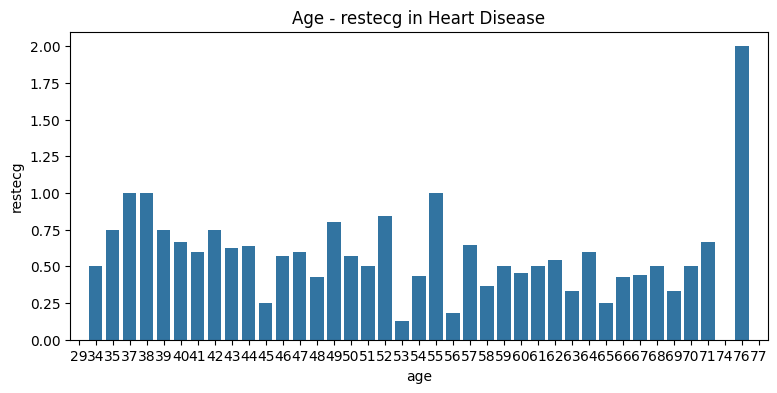

In [3]:
fig, ax = plt.subplots(figsize=(9, 4))

sns.barplot(
    x=df["age"],
    y=df["restecg"],
    errorbar=None,
    # palette="dark:salmon_r",
    ax=ax,
).set(title="Age - restecg in Heart Disease")
plt.show()

### distribution of age to density of the dataset


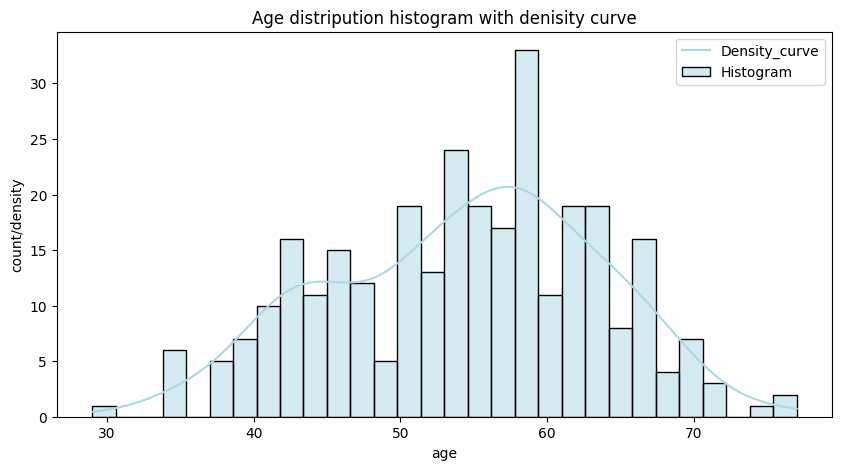

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(
    df["age"],
    bins=30,
    kde=True,
    color="lightblue",
    ax=ax,
)

ax.set_xlabel("age")
ax.set_ylabel("count/density")
ax.set_title("Age distripution histogram with denisity curve")
ax.legend(["Density_curve", "Histogram"])

plt.show()

<h4 style=" color: red; padding:0px; margin:0px">Describing the Dataset.</h4>
we can see the <text style="color: yellow;">count</text> (number of rows)</br>
we can see the <text style="color: yellow;">mean</text></br>
we can see the <text style="color: yellow;">std</text> (Standard deviation)</br>
we can see the <text style="color: yellow;">min</text> (minimum) and <text style="color: yellow;">max</text> (maximum)</br>
and the we can see the <text style="color: yellow;">25, 50, 75th percentiles </text>or all fields


In [5]:
df.describe().T  # I transposed it to make it easier to read

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<h4 style=" color: red; padding:0px; margin:0px">Checking for nulls.</h4>


In [6]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


Checking Datatype of the columns


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

<h4 style=" color: red; padding:0px; margin:0px"><h4 style=" color: red; padding:0px; margin:0px">Splitting data into input and target values.</h4></h4>


#### getting the X values


In [8]:
X = df.iloc[:, 0:-1]
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


##### Getting the Y values


In [9]:
Y = df.iloc[:, -1]
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

#

<h4 style=" color: red; padding:0px; margin:0px">Separating Data into Training and Test sets.</h4></br>
I used test size of 30% </br> i set "random_state=100" for developer purposes to reproduce results. </br>
idealy i would take it out and allow the split to be random every time a split is done


In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=100
)

<h4 style=" color: red; padding:0px; margin:0px">Training a LogisticRegression and KNeighborsClassifier model.</h4>


####

<h4>Training the Logistic regression model</h4>
I get the a convergence warning when i train the data without scaling. as in the image below

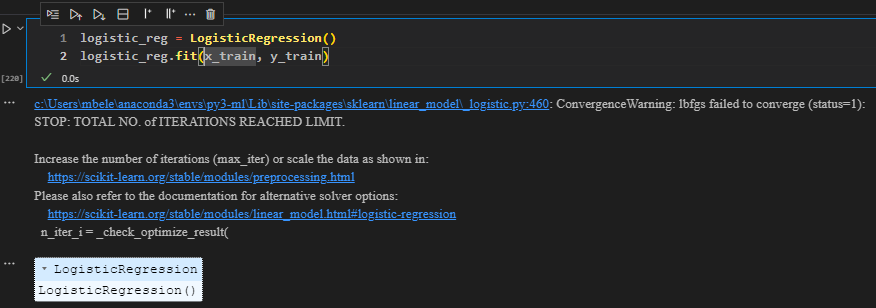 </br> There are two ways of solving this. i
could </br> increase the iterations. which would look look like;</br></br>
<text style = "color: purple">logistic_reg = LogisticRegression ( max_iter =
1000 ) </text>.</br>

OR </br>

Use <text style="color: orange">sklearn's preprocessing</text> class and
<text style="color: orange">pipeline </text> to resolve it as i did below.</br>
However, the model performance isn't too different even with the scalling.

<a href="https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter"><b>Click
here for a better explanation of the warning on stackoverflow</b></a>


In [11]:
# Importing and making use of this resolves the iteration error.
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# * using increasing iterations
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(x_train, y_train)

# * using preprocessing and pipeline
# logistic_reg = make_pipeline(StandardScaler(), LogisticRegression())
# logistic_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

####

Training the <em><b style="color: orange">KNN</b></em> model


In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(1)  # training for 10 neighbors
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#

<h4 style=" color: red; padding:0px; margin:0px">Comparing the scores for both models</h4></br>
The Logistic Regression model has a higher score than the KNN on the train set


In [13]:
print("Logistic regression: ", logistic_reg.score(x_train, y_train))
print("kNN regressor with n=10: ", knn_clf.score(x_train, y_train))

Logistic regression:  0.8679245283018868
kNN regressor with n=10:  1.0


<h4 style=" padding:0px; margin:0px">Prediction on both models for the <b style="color:orange"><em>Test set.<em></b></h4>


In [14]:
# Prediction on the Logistic regressoin
y_predict1 = logistic_reg.predict(x_test)

# Prediction on the KNN classifier
y_predict2 = knn_clf.predict(x_test)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

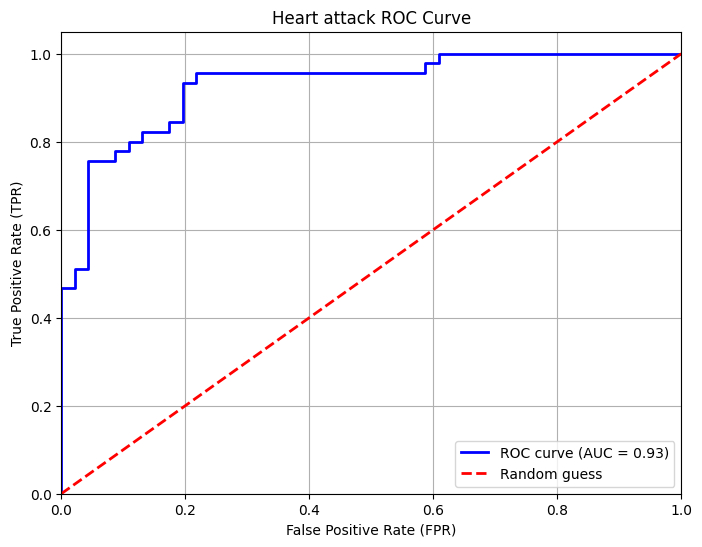

In [16]:
# Predict probabilities for the positive class
y_prob = logistic_reg.predict_proba(x_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--", label="Random guess")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Heart attack ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

<h4 style="padding:0px; margin:0px"> Side by side comparison of the Confusion matrix for the <b ><em style="color:orange" >Logistic regression model</b></em> and the <em style="color:orange"><b>KNeighborsClassifier model.</b></em></b></h4>


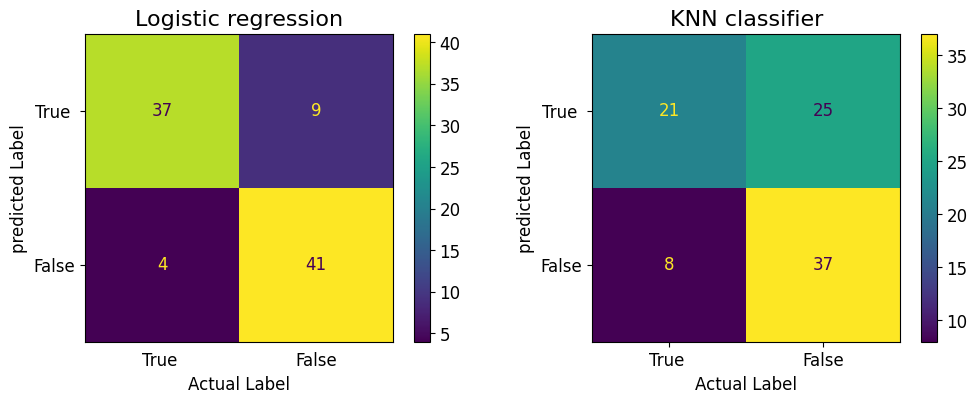

In [17]:
title_size = 16
plt.rcParams.update({"font.size": 12})

display_labels = [
    "True ",
    "False",
]

cm0 = confusion_matrix(y_test, y_predict1, labels=logistic_reg.classes_)
cm1 = confusion_matrix(y_test, y_predict2, labels=knn_clf.classes_)
f, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first confusion matrix (linear Regression) at position (0, 0)
axes[0].set_title("Logistic regression", size=title_size)
ConfusionMatrixDisplay(confusion_matrix=cm0, display_labels=display_labels).plot(
    include_values=True,
    ax=axes[0],
    # colorbar=colorbar,
)

axes[0].set_xlabel("Actual Label")
axes[0].set_ylabel("predicted Label")
axes[0].tick_params(axis="x", which="both", bottom=False, top=False)

# KNN Plot
axes[1].set_title("KNN classifier", size=title_size)
ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=display_labels).plot(
    include_values=True,
    ax=axes[1],
    # colorbar=colorbar,
)

axes[1].set_xlabel("Actual Label")
axes[1].set_ylabel("predicted Label")

plt.show()

<h3 style="padding:0px; margin:0px">Conclusion</h3>
Based off The comparison of the above confusion matrices, the <text style="color:green"><em>Logistic Regression</em></text></br>
performs better than the <text style="color:red"> <em>KNN model</em></text>

When i take out the random seed when doing the "train_test_split",</br> there
were instances where the the <em style="color:green">Logistic Regression</em>
confusion matrix would </br>show a slightly better results than the same model
with a random seed set to 100.</br> However, it still always produces better
results than the <text style="color:red">KNN</text>

<b>So i would say <em style="color:green" >Logistic Regression</em> is superior
to the <em style="color:red">KNN classifier</em> in with regards to the heart
attack dataset</b>


In [18]:
# df_num = df.select_dtypes(include=["float64", "int64"])
# df_num.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6)